## '서울시 생활정보 기반 대중교통 수요분석'
* 동국대학교 정보통신공학과 2018112095 유병민

---

## '버스 정류장 데이터' 확인

## 기본전제

[기본 데이터]
* 1.1 bus_station_boarding_month_202401.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_202401.xlsx

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

In [40]:
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [41]:
# 아래 실습코드를 실행해주세요.

import sys
import numpy as np
import pandas as pd

In [42]:
bus_station = pd.read_csv('1.1 bus_station_boarding_month_202401.csv', sep=",", encoding = "cp949")

In [43]:
bus_station.shape

(1048575, 8)

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

In [44]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104


In [45]:
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129


In [46]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [47]:
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.024011e+07,1.030953e+02,1.010178e+02,2.024012e+07
std,7.455044e+00,1.486801e+02,1.348374e+02,7.455044e+00
min,2.024010e+07,0.000000e+00,0.000000e+00,2.024010e+07
25%,2.024011e+07,1.300000e+01,1.600000e+01,2.024011e+07
50%,2.024011e+07,5.700000e+01,6.200000e+01,2.024012e+07
75%,2.024012e+07,1.370000e+02,1.370000e+02,2.024012e+07
max,2.024013e+07,5.027000e+03,4.352000e+03,2.024013e+07


#### [목표] 위 데이터에서 버스정류장 위치를 구 별로 구분 해보기

* 'bus_station' 데이터의 정보를 확인해보세요.

* 버스정류장 ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가 -> 정류장이 위치한 구 이름을 등록

In [48]:
# 버스정류장 ARS번호의 앞 두자리 확인
bus_station[['버스정류장ARS번호']]

,버스정류장ARS번호
0,6178
1,22337
2,22336
3,22334
4,22333
...,...
1048570,1837
1048571,1831
1048572,1514
1048573,8454


In [49]:
bus_station['자치구'] = bus_station['버스정류장ARS번호'].str[:1] # 4자리 경우
bus_station.loc[bus_station['버스정류장ARS번호'].str.len() == 5, '자치구'] = bus_station['버스정류장ARS번호'].str[:2]

bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104,6
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104,22
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104,22
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104,22
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104,22
...,...,...,...,...,...,...,...,...,...
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,1
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,1
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,1
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,8


* 버스정류장 ARS 번호 : 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [50]:
bus_station['자치구'] =bus_station['자치구'].map({'1': '종로구',
    '2': '중구',
    '3': '용산구',
    '4': '성동구',
    '5': '광진구',
    '6': '동대문구',
    
    '7': '중랑구',
    '8': '성북구',
    '9': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104,동대문구
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104,서초구
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104,서초구
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104,서초구
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104,서초구
...,...,...,...,...,...,...,...,...,...
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,성북구


#### [목표] 결측치 처리하기


In [51]:
# (가상), (기점가상) 정류장은 ARS번호가 '~'로 나옵니다.
# (가상) 정류장 : 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 가상의 정류장을 설정, 실제하지 않음
# '버스정류장ARS번호'가 '~'인 곳을 확인해주세요.

delete = bus_station.loc[(bus_station['버스정류장ARS번호'] == '0') | (bus_station['버스정류장ARS번호'] == '~')]

bus_station.dropna(inplace= True)

In [55]:
bus_station.isnull().sum()

사용일자          0
노선번호          0
노선명           0
버스정류장ARS번호    0
역명            0
승차총승객수        0
하차총승객수        0
등록일자          0
자치구           0
dtype: int64

In [56]:
bus_station_2 = bus_station.copy()

In [59]:
bus_station.drop((bus_station['버스정류장ARS번호'] == '0').index | (bus_station['버스정류장ARS번호'] == '~').index )

bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104,동대문구
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104,서초구
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104,서초구
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104,서초구
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104,서초구
...,...,...,...,...,...,...,...,...,...
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,성북구


In [60]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  object
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int64(4), object(5)
memory usage: 105.6+ MB


In [61]:
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)

In [62]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  int32 
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int32(1), int64(4), object(4)
memory usage: 101.9+ MB


#### [목표] 구별로 버스정류장의 개수 확인하기 (서울시)


In [63]:
bus_station_count = bus_station.groupby('자치구')['버스정류장ARS번호'].nunique().reset_index()
bus_station_count

,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,468
5,광진구,280
6,구로구,486
7,금천구,347
8,노원구,496
9,도봉구,368


In [79]:
# 중랑구에 428개의 버스정류장이 있다는데, 실제 ARS번호를 확인해봅시다.
# 자치구별 버스정류장 고유값들을 출력하여 'bus_staiton_unique' 변수로 저장
# 중랑구 버스정류장ARS번호 전체 출력

jungrang = bus_station[bus_station['자치구'] == '중랑구']['버스정류장ARS번호'].unique()
bus_station_unique = bus_station.groupby('자치구')['버스정류장ARS번호'].unique()

print(jungrang)

[7142 7136 7138 7465 7440 7438 7432 7433 7435 7434 7008 7007 7336 7335
 7334 7333 7297 7296 7295 7294 7274 7273 7272 7271 7270 7269 7249 7247
 7245 7243 7233 7231 7229 7227 7225 7223 7222 7221 7220 7219 7218 7217
 7216 7199 7197 7195 7194 7145 7144 7131 7129 7117 7006 7005 7004 7003
 7002 7001 7616 7817 7830 7828 7831 7021 7587 7595 7592 7593 7594 7820
 7818 7819 7516 7515 7502 7501 7554 7553 7500 7499 7498 7496 7494 7821
 7829 7832 7043 7045 7060 7057 7054 7058 7020 7014 7011 7013 7015 7016
 7446 7551 7466 7463 7464 7462 7451 7450 7454 7455 7452 7453 7456 7448
 7332 7331 7330 7329 7328 7327 7325 7300 7299 7298 7250 7248 7246 7244
 7242 7232 7230 7228 7226 7224 7211 7210 7209 7208 7207 7206 7205 7204
 7203 7192 7191 7190 7189 7188 7187 7143 7141 7140 7118 7410 7476 7302
 7304 7305 7306 7337 7418 7010 7009 7550 7303 7307 7420 7421 7424 7012
 7178 7180 7181 7182 7183 7184 7185 7186 7111 7112 7113 7114 7115 7116
 7275 7276 7277 7278 7279 7280 7261 7262 7263 7264 7265 7266 7267 7268
 7443 

In [80]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인 

invalid_ars_numbers = bus_station[~bus_station['버스정류장ARS번호'].astype(str).str.startswith(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'))]
print(invalid_ars_numbers)

print(jungrang[jungrang == 7674])

Empty DataFrame
Columns: [사용일자, 노선번호, 노선명, 버스정류장ARS번호, 역명, 승차총승객수, 하차총승객수, 등록일자, 자치구]
Index: []
[7674]


In [82]:
# 서울의 버스 정류장 데이터만 포함하고 있는 excel 파일 열기 ('1.1 bus_station_202401.xlsx')

only_seoul = pd.read_excel('"1.1 bus_station_202401.xlsx"')

In [83]:
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS_ID  11263 non-null  int64 
 1   정류소명    11263 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.1+ KB


In [84]:
only_seoul.head()

,ARS_ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [86]:
only_seoul.rename(columns={'ARS_ID':'버스정류장ARS번호'},inplace= True)
only_seoul

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
11258,25995,우성아파트
11259,25996,우성아파트
11260,25997,조일약국
11261,25998,성내시장


In [87]:
# 'only_seoul'과 'bus_station' 데이터 병합

df = pd.merge(only_seoul,bus_station,on = '버스정류장ARS번호', how = 'inner')
df

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구
...,...,...,...,...,...,...,...,...,...,...
957604,25990,암사삼성.현대아파트,20240122,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),80,27,20240125,강동구
957605,25990,암사삼성.현대아파트,20240123,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),90,29,20240126,강동구
957606,25990,암사삼성.현대아파트,20240124,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),90,23,20240127,강동구
957607,25990,암사삼성.현대아파트,20240125,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),88,30,20240128,강동구


In [88]:
seoul_bus_station_ARS = df.groupby('자치구')['버스정류장ARS번호'].nunique().reset_index()
seoul_bus_station_ARS

,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,466
5,광진구,274
6,구로구,486
7,금천구,346
8,노원구,495
9,도봉구,366


In [89]:
# 서울시에 있는 버스정류장 개수 구하기
print(seoul_bus_station_ARS.sum())

자치구           강남구강동구강북구강서구관악구광진구구로구금천구노원구도봉구동대문구동작구마포구서대문구서초...
버스정류장ARS번호                                                10652
dtype: object


#### [목표] 구 별로 버스 노선의 개수 확인하기

In [90]:
# 자치구별 노선번호의 개수 구하기, 'seoul_bus_staion_line' 변수로 저장
seoul_bus_station_line = df.groupby('자치구')['노선번호'].nunique().reset_index()
seoul_bus_station_line

,자치구,노선번호
0,강남구,98
1,강동구,22
2,강북구,71
3,강서구,51
4,관악구,81
5,광진구,43
6,구로구,80
7,금천구,56
8,노원구,58
9,도봉구,54


#### [목표] 각 구별로 승차 총 승객수, 하차 총 승객수 구하기

In [91]:
seoul_bus_station_sum = df.groupby('자치구')[['승차총승객수','하차총승객수']].sum()
seoul_bus_station_sum

,승차총승객수,하차총승객수
자치구,,
강남구,6960336,6597087
강동구,2515582,2460905
강북구,3998077,3858057
강서구,3981173,3963283
관악구,5862490,5996915
광진구,2365355,2382437
구로구,4204229,4023135
금천구,3133461,3014364
노원구,3553485,3497450


#### [목표] 각 구별 승차 평균 승객수, 하차 평균 승객수 구하기

In [94]:
# 자치구별 "승차총승객수","하차총승객수"의 평균 구하기, 'seoul_bus_station_mean' 변수로 저장
# '승차총승객수' -> '승차평균승객수', '하차총승객수' -> '하차평균승객수'로 열이름 변경

seoul_bus_station_mean = df.groupby('자치구')[['승차총승객수','하차총승객수']].mean()
df.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'},inplace=True)
df

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차평균승객수,하차평균승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구
...,...,...,...,...,...,...,...,...,...,...
957604,25990,암사삼성.현대아파트,20240122,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),80,27,20240125,강동구
957605,25990,암사삼성.현대아파트,20240123,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),90,29,20240126,강동구
957606,25990,암사삼성.현대아파트,20240124,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),90,23,20240127,강동구
957607,25990,암사삼성.현대아파트,20240125,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트(00044),88,30,20240128,강동구


#### [목표] 데이터 프레임 합치기

In [97]:
# 네 개 파일을 합쳐주세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

merge_all = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line, on='자치구', how='outer')
merge_all = pd.merge(merge_all,seoul_bus_station_sum, on='자치구', how='outer')
merge_all = pd.merge(merge_all,seoul_bus_station_mean, on='자치구', how='outer')

merge_all.rename(columns={'승차총승객수_x':'승차총승객수','하차총승객수_x':	'하차총승객수','승차총승객수_y':'승차평균승객수','하차총승객수_y':'하차평균승객수'},inplace=True)
merge_all

,자치구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996
5,광진구,274,43,2365355,2382437,107.491706,108.267985
6,구로구,486,80,4204229,4023135,114.700415,109.759781
7,금천구,346,56,3133461,3014364,123.088384,118.410025
8,노원구,495,58,3553485,3497450,83.356439,82.041989
9,도봉구,366,54,2771076,2695540,101.649829,98.878985


In [98]:
# '버스정류장ARS번호' -> '정류장수', '노선번호' -> '노선수'로 열이름 변경
merge_all.rename(columns={'버스정류장ARS번호' : '정류장수', '노선번호' : '노선수'},inplace=True)
merge_all

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996
5,광진구,274,43,2365355,2382437,107.491706,108.267985
6,구로구,486,80,4204229,4023135,114.700415,109.759781
7,금천구,346,56,3133461,3014364,123.088384,118.410025
8,노원구,495,58,3553485,3497450,83.356439,82.041989
9,도봉구,366,54,2771076,2695540,101.649829,98.878985


In [99]:
# 데이터프레임을 CSV 파일로 저장 (인코딩 설정)
merge_all.to_csv('merged_data_1.1.csv', index=False, encoding='cp949')

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [100]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [목표] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [101]:
data = pd.read_csv('merged_data_1.1.csv',sep=",",encoding = 'cp949')

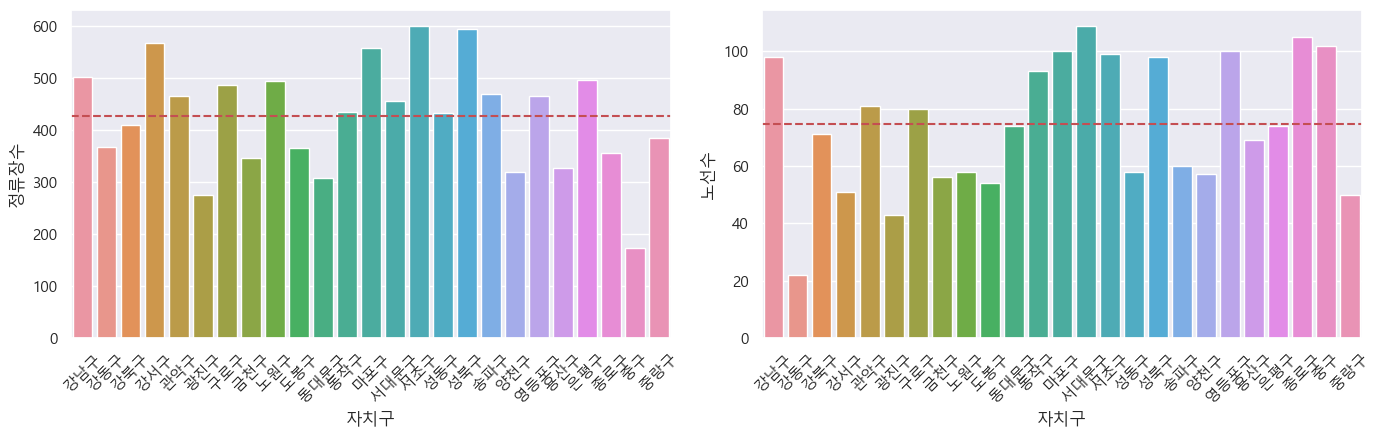

In [102]:
plt.figure(figsize=(14, 8))

# 자치구별 정류장 수를 볼 수 있는 그래프를 출력해주세요.
plt.subplot(2, 2, 1)
sns.barplot(x="자치구", y="정류장수", data=data)
plt.xticks(rotation=45)  # x 축 레이블 기울이기
average_value = data["정류장수"].mean()
plt.axhline(y=average_value, color='r', linestyle='--', label='전체 평균')

plt.subplot(2, 2, 2)
# 자치구 별 노선 수 비교
sns.barplot(x="자치구", y="노선수", data=data)
plt.xticks(rotation=45)  # x 축 레이블 기울이기
average_value = data["노선수"].mean()
plt.axhline(y=average_value, color='r', linestyle='--', label='전체 평균')

plt.tight_layout()
plt.show()

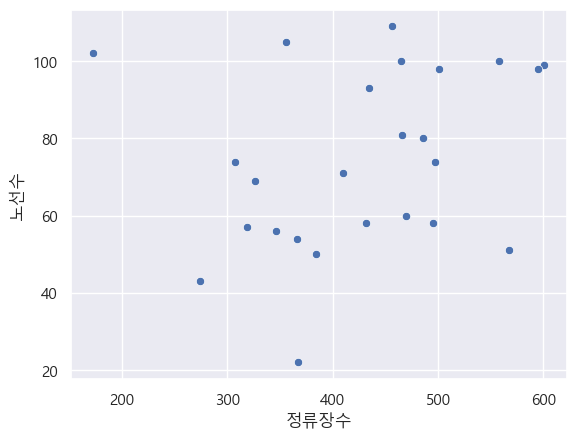

PearsonRResult(statistic=0.27239833340027575, pvalue=0.18772533029186592)

In [103]:
sns.scatterplot(x='정류장수', y='노선수', data = data)
plt.show()
stats.pearsonr(data['정류장수'], data['노선수'])

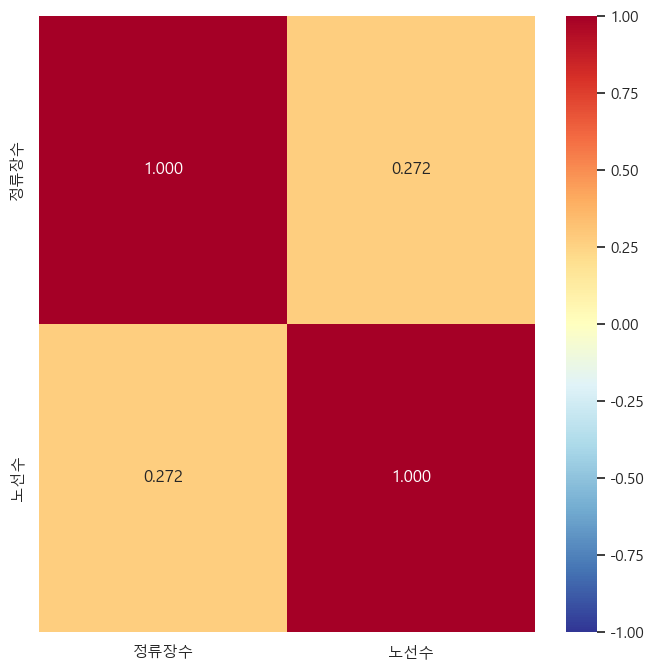

In [104]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(data[['정류장수','노선수']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

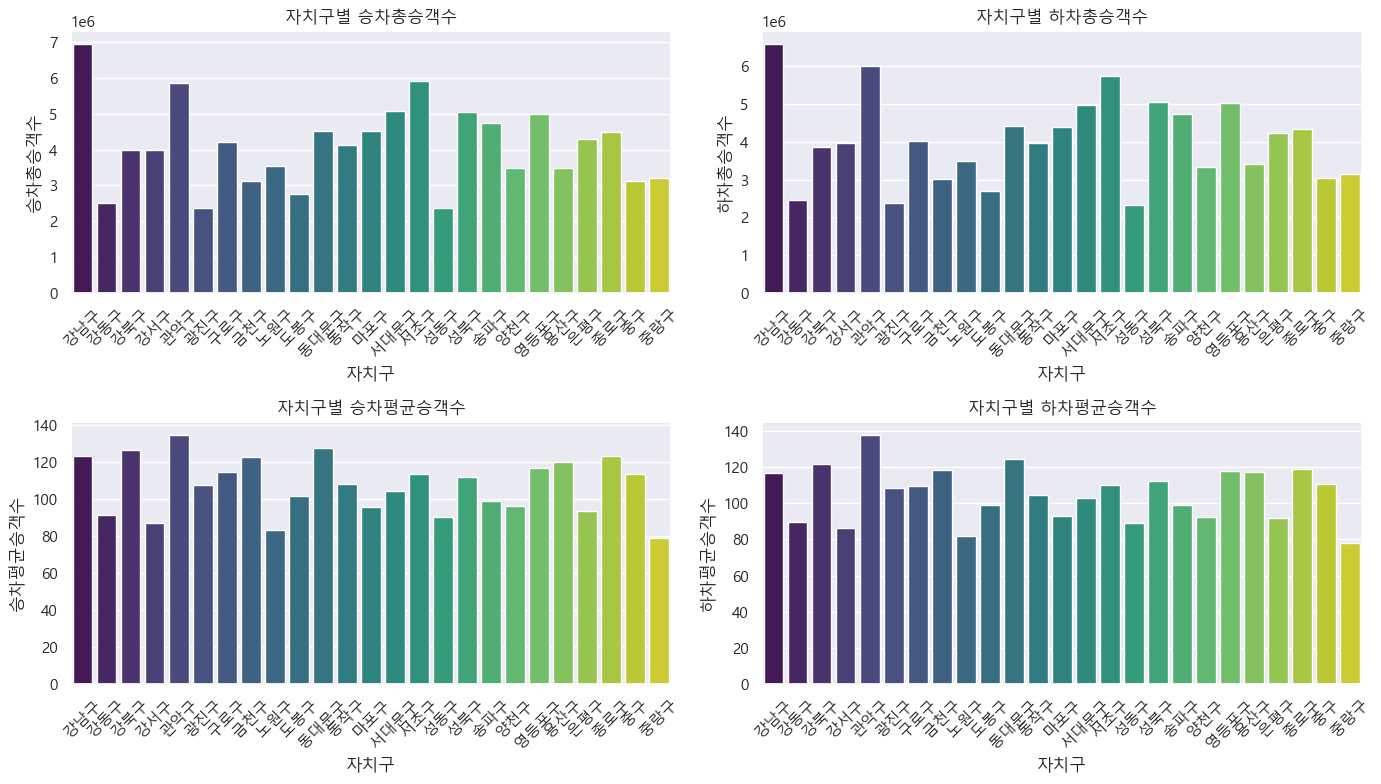

In [105]:
# 자치구별 승차 및 하차 평균 비교
plt.figure(figsize=(14, 8))

# 승차총승객수
plt.subplot(2, 2, 1)
sns.barplot(x='자치구', y='승차총승객수', data=data, palette='viridis')
plt.title('자치구별 승차총승객수')
plt.xticks(rotation=45)  # x 축 레이블 기울이기

# 하차총승객수
plt.subplot(2, 2, 2)
sns.barplot(x='자치구', y='하차총승객수', data=data, palette='viridis')
plt.title('자치구별 하차총승객수')
plt.xticks(rotation=45)  # x 축 레이블 기울이기

# 승차평균승객수
plt.subplot(2, 2, 3)
sns.barplot(x='자치구', y='승차평균승객수', data=data, palette='viridis')
plt.title('자치구별 승차평균승객수')
plt.xticks(rotation=45)  # x 축 레이블 기울이기

# 하차평균승객수
plt.subplot(2, 2, 4)
sns.barplot(x='자치구', y='하차평균승객수', data=data, palette='viridis')
plt.title('자치구별 하차평균승객수')
plt.xticks(rotation=45)  # x 축 레이블 기울이기


plt.tight_layout()
plt.show()

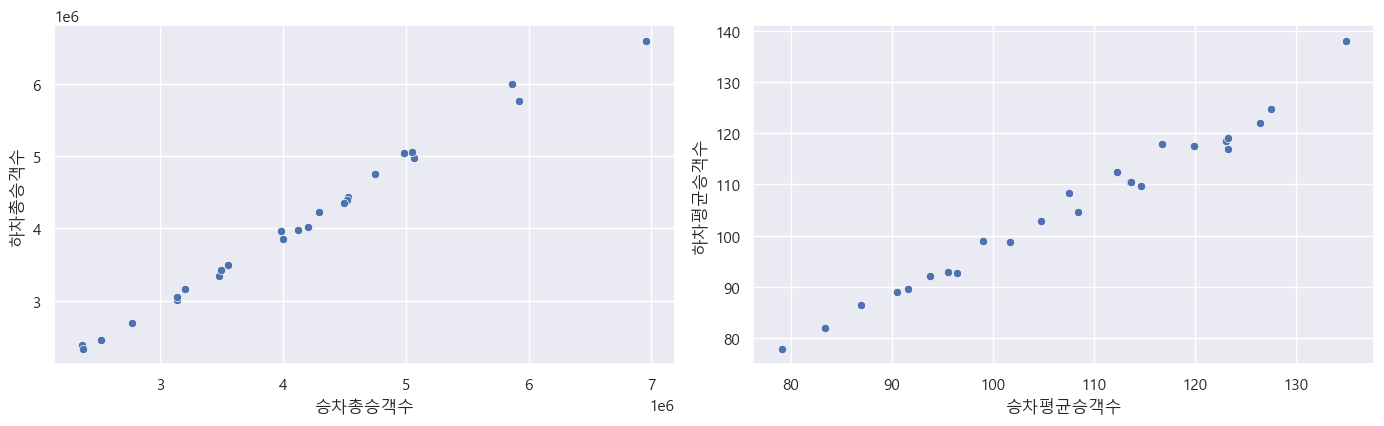

In [106]:
# 상관관계 분석(승하차 비율에 따른 노선수나 정류장 수가 인과관계가 있다?)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='승차총승객수', y='하차총승객수', data = data)
stats.pearsonr(data['승차총승객수'], data['하차총승객수'])

plt.subplot(2, 2, 2)
sns.scatterplot(x='승차평균승객수', y='하차평균승객수', data = data)
stats.pearsonr(data['승차평균승객수'], data['승차평균승객수'])

plt.tight_layout()
plt.show()

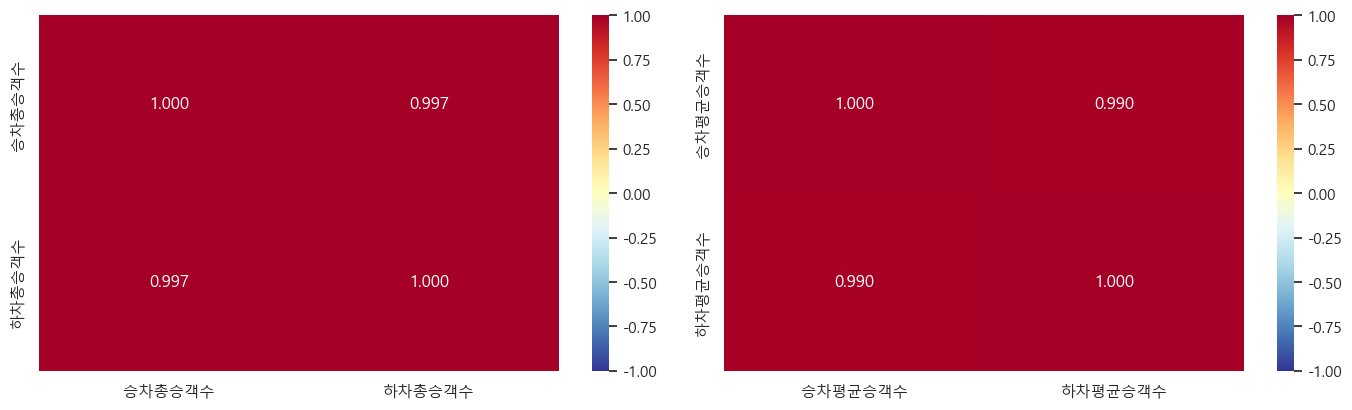

In [107]:
# 상관계수를 heatmap으로 시각화
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.heatmap(data[['승차총승객수','하차총승객수']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값

plt.subplot(2, 2, 2)
sns.heatmap(data[['승차평균승객수','하차평균승객수']].corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.tight_layout()
plt.show()

In [ ]:
# 승차총 승객수와 하차총 승객수 그리고 승차평균승객수와 하차평균승객수는 역시 강한 상관관계를 보인다.
# 노선을 추가하는 곳의 우선 순위로 승차와 하차가 많이 이루어지는 곳이어야 한다.